# Завдання

1. Напишіть код для визначення границь та кутів у зображенні за допомогою фільтра Собеля.
2. Використовуючи HOG-метод, напишіть код для витягування ознак з зображення.
3. Завантажте датасет COFAR-10 та використайте HOG для отримання ознак зображень. Застосуйте будь-який простий класифікатор для класифікації зображень та обчисліть метрики точності.
4. Використайте методи SIFT для витягування ознак з зображень та порівняйте його з методом HOG за допомогою метрик точності.

## Рішення

### 1. Напишіть код для визначення границь та кутів у зображенні за допомогою фільтра Собеля.

In [31]:
import cv2 as cv2
from matplotlib import pyplot as plt

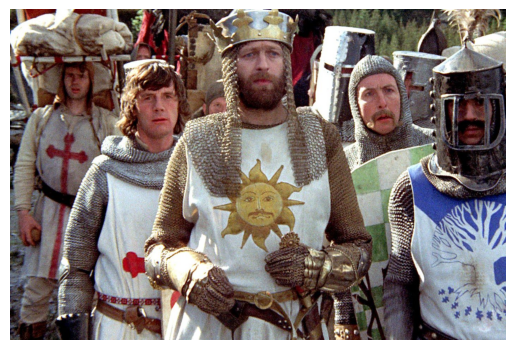

In [32]:
img = cv2.imread('monty_python.jpg')
plt.axis('off')
plt.imshow(img[..., ::-1])
plt.show()

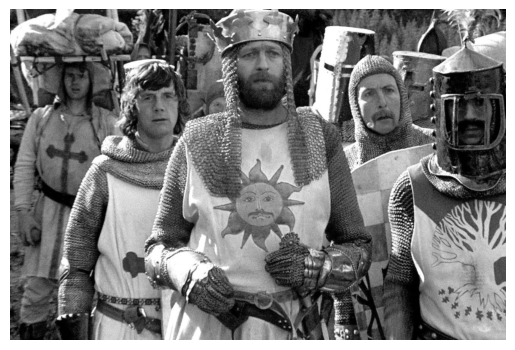

In [33]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.axis('off')
plt.imshow(gray, cmap='gray')
plt.show()

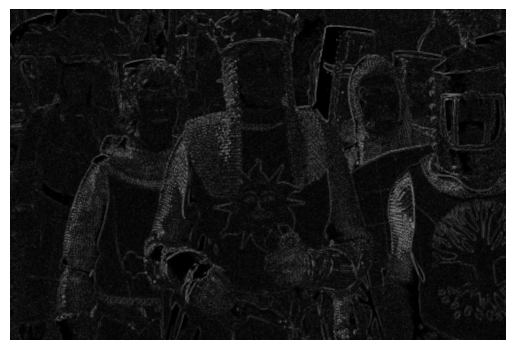

In [34]:
sobelx = cv2.Sobel(gray, cv2.CV_64F, 2, 0, ksize=5)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 2, ksize=5)
mag, ang = cv2.cartToPolar(sobelx, sobely, angleInDegrees=True)

plt.axis('off')
plt.imshow(mag, cmap='gray')
plt.show()

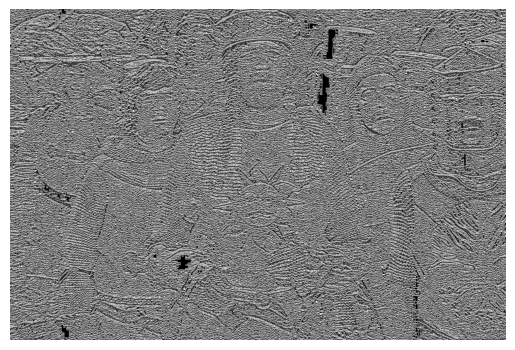

In [35]:
plt.axis('off')
plt.imshow(ang, cmap='gray')
plt.show()

### 2. Використовуючи HOG-метод, напишіть код для витягування ознак з зображення.

In [36]:
from skimage.feature import hog
from skimage import data, exposure

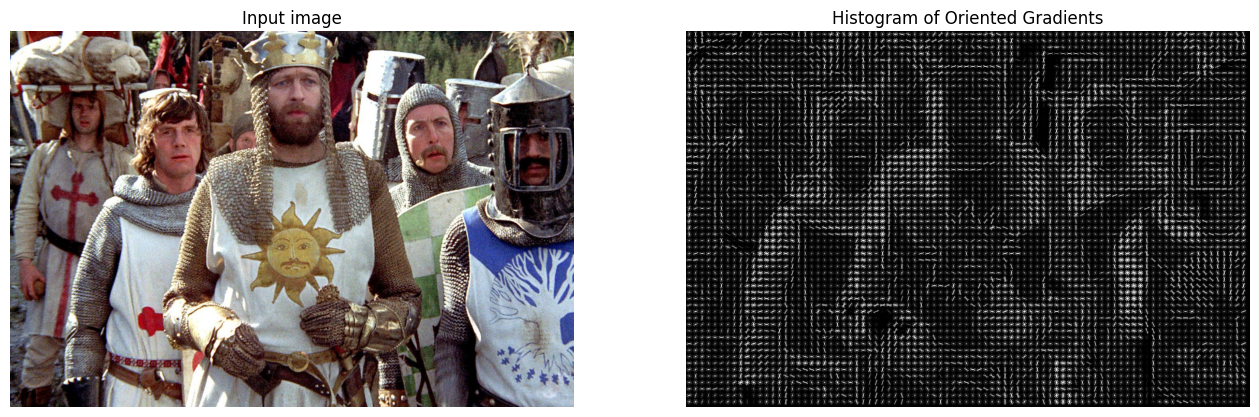

In [37]:
fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img[..., ::-1])
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

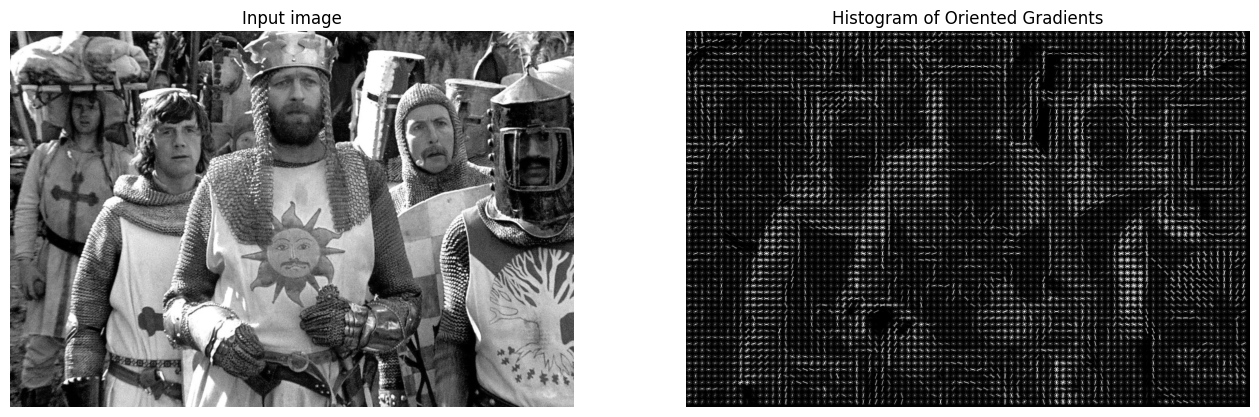

In [38]:
fd, hog_image = hog(gray, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(gray, cmap='gray')
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

### 3. Завантажте датасет COFAR-10 та використайте HOG для отримання ознак зображень. Застосуйте будь-який простий класифікатор для класифікації зображень та обчисліть метрики точності.

In [39]:
from skimage.feature import hog
import joblib
import os
import time
from sklearn.svm import LinearSVC
import glob
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [40]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [41]:
def getData(filePath):
    TrainData = []
    TestData = []
    for childDir in os.listdir(filePath):
        if 'data_batch' in childDir:
            f = os.path.join(filePath, childDir)
            data = unpickle(f)
            train = np.reshape(data[b'data'], (10000, 3, 32 * 32))
            labels = np.reshape(data[b'labels'], (10000, 1))
            fileNames = np.reshape(data[b'filenames'], (10000, 1))
            datalebels = zip(train, labels, fileNames)
            TrainData.extend(datalebels)
        if childDir == "test_batch":
            f = os.path.join(filePath, childDir)
            data = unpickle(f)
            test = np.reshape(data[b'data'], (10000, 3, 32 * 32))
            labels = np.reshape(data[b'labels'], (10000, 1))
            fileNames = np.reshape(data[b'filenames'], (10000, 1))
            TestData = zip(test, labels, fileNames)
    return TrainData, TestData

In [42]:
def getFeat_hog(TrainData, TestData):
    for data in TestData:
        image = np.reshape(data[0].T, (32, 32, 3))
        gray = rgb2gray(image)/255.0
        fd = hog(gray, orientations = 9, pixels_per_cell = [8, 8], cells_per_block = [2, 2])
        fd = np.concatenate((fd, data[1]))
        filename = list(data[2])
        fd_name = str(filename[0], encoding = "utf-8") .split('.')[0]+'.feat'
        fd_path = os.path.join('./data/features/test/', fd_name)
        joblib.dump(fd, fd_path)
    print("Test features are extracted and saved.")
    for data in TrainData:
        image = np.reshape(data[0].T, (32, 32, 3))
        gray = rgb2gray(image)/255.0
        fd = hog(gray, orientations = 9, pixels_per_cell = [8, 8], cells_per_block = [2, 2])
        fd = np.concatenate((fd, data[1]))
        filename = list(data[2])
        fd_name = str(filename[0], encoding="utf-8") .split('.')[0]+'.feat'
        fd_path = os.path.join('./data/features/train/', fd_name)
        joblib.dump(fd, fd_path)
    print("Train features are extracted and saved.")
def rgb2gray(im):
    gray = im[:, :, 0]*0.2989+im[:, :, 1]*0.5870+im[:, :, 2]*0.1140
    return gray

In [43]:
t0 = time.time()
filePath = r'J:\StartUP-IT-Academy\Lesson_62\cifar-10-batches-py'
TrainData, TestData = getData(filePath)
getFeat_hog(TrainData, TestData)
t1 = time.time()
print("Features are extracted and saved.")
print('The cast of time is:%f'%(t1-t0))

Test features are extracted and saved.
Train features are extracted and saved.
Features are extracted and saved.
The cast of time is:41.262403


In [44]:
t0 = time.time()
clf_type = 'LIN_SVM'
fds = []
labels = []
num = 0
total = 0
for feat_path in glob.glob(os.path.join('./data/features/train', '*.feat')):
    data = joblib.load(feat_path)
    fds.append(data[:-1])
    labels.append(data[-1])
if clf_type == 'LIN_SVM':
    clf = LinearSVC()
    print("Training a Linear SVM Classifier.")
    clf.fit(fds, labels)
    print("Classifier saved to {}".format('./data/models/svm.model'))
    for feat_path in glob.glob(os.path.join('./data/features/test', '*.feat')):
        total += 1
        data_test = joblib.load(feat_path)
        temp = data_test[:-1]
        data_test_feat = temp.reshape((1, -1))
        result = clf.predict(data_test_feat)
        if int(result) == int(data_test[-1]):
            num += 1
    rate = float(num) / total
    t1 = time.time()
    print('The classification accuracy is %f' % rate)
    print('The cast of time is :%f' % (t1 - t0))

Training a Linear SVM Classifier.
Classifier saved to ./data/models/svm.model
The classification accuracy is 0.513700
The cast of time is :75.604901


### 4. Використайте методи SIFT для витягування ознак з зображень та порівняйте його з методом HOG за допомогою метрик точності.

In [45]:
import cv2
from sklearn.cluster import KMeans
from sklearn.svm import SVC
import numpy as np
from keras.datasets import cifar10
from sklearn.metrics import accuracy_score

In [46]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

sift = cv2.SIFT_create()  # Викроситання SIFT
descriptors = []

# Отримання дескрипторів для всіх зображень у наборі даних
for i in np.arange(x_train.shape[0]):
    _, imgDesc = sift.detectAndCompute(x_train[i], None)
    if imgDesc is not None:
        for j in np.arange(imgDesc.shape[0]):
            descriptors.append(imgDesc[j])

descriptors = np.array(descriptors)

kmeans = KMeans(n_clusters=10).fit(descriptors)

train_hist_X = []
train_hist_Y = []

for i in np.arange(x_train.shape[0]):
    _, imgDesc = sift.detectAndCompute(x_train[i], None)
    if imgDesc is not None:
        kcent = kmeans.predict(imgDesc)
        hist, _ = np.histogram(kcent, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], normed=True)
        train_hist_X.append(hist)
        train_hist_Y.append(y_train[i])

train_hist_X = np.array(train_hist_X).reshape((-1, 10))
train_hist_Y = np.array(train_hist_Y).reshape((-1,))

# Train SVM

modSVM = SVC()
modSVM.fit(train_hist_X, train_hist_Y.reshape((-1,)))

conf_matrix_test = np.zeros((10, 10))

preds = []
labels = []
for i in np.arange(x_test.shape[0]):
    _, imgDesc = sift.detectAndCompute(x_test[i], None)
    if imgDesc is not None:
        kcent = kmeans.predict(imgDesc)
        hist, _ = np.histogram(kcent, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], normed=True)
        ret = modSVM.predict(hist.reshape((1, -1)))[0]
        preds.append(ret)
        labels.append(y_test[i, 0])
        real = y_test[i, 0]
        conf_matrix_test[real, ret] = conf_matrix_test[real, ret] + 1

print("accuracy is {0}".format(accuracy_score(labels, preds)))

accuracy is 0.2176222935044106


#### Висновок:
У нашому випадку метод HOG дає кращі результати, хоча і він далекий від ідеалу.